In [209]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

#BITCOIN API: url setup
url = 'https://api.coindesk.com/v1/bpi/historical/close.json?'
default = 'start=2020-01-01&end=2020-12-31'

# set start and end date variables
# NOTE: must stay within 2020 range, csv files (dow & gold) are limited to this range
start_date = '2020-01-01'
end_date = '2020-12-31'

# DOW: file to Load, read csv, dataframe
file_to_load = "data/dow.csv"
dow_data = pd.read_csv(file_to_load)
dow_data_df = pd.DataFrame(dow_data)

# GOLD: file to load, read csv, dataframe
file_to_load = "data/gold.csv"
gold_data = pd.read_csv(file_to_load)
gold_data_df = pd.DataFrame(gold_data)
gold_data_df.columns = gold_data_df.columns.tolist()[:1] + ['Close'] + gold_data_df.columns.tolist()[2:]

In [210]:
# BITCOIN: create query url for start and end date, request json
query_url = f'{url}start={start_date}&end={end_date}'
pprint(requests.get(query_url).json())

{'bpi': {'2020-01-01': 7188.4633,
         '2020-01-02': 6961.5683,
         '2020-01-03': 7346.58,
         '2020-01-04': 7355.855,
         '2020-01-05': 7356.3117,
         '2020-01-06': 7761.825,
         '2020-01-07': 8157.7617,
         '2020-01-08': 8042.8733,
         '2020-01-09': 7816.9233,
         '2020-01-10': 8189.265,
         '2020-01-11': 8016.4267,
         '2020-01-12': 8178.8833,
         '2020-01-13': 8105.4783,
         '2020-01-14': 8807.4267,
         '2020-01-15': 8808.4867,
         '2020-01-16': 8716.9133,
         '2020-01-17': 8890.25,
         '2020-01-18': 8901.17,
         '2020-01-19': 8698.5717,
         '2020-01-20': 8631.2883,
         '2020-01-21': 8727.6033,
         '2020-01-22': 8661.01,
         '2020-01-23': 8392.145,
         '2020-01-24': 8436.49,
         '2020-01-25': 8337.1017,
         '2020-01-26': 8602.7417,
         '2020-01-27': 8901.5067,
         '2020-01-28': 9393.2733,
         '2020-01-29': 9290.46,
         '2020-01-30': 9508.72

In [211]:
# BITCOIN: create response, create dataframe of date range results from API
response = requests.get(query_url).json()
my_dict = response['bpi']
test_df = pd.DataFrame(list(my_dict.items()),columns = ['close date','close price']) 

# test_df

In [212]:
# DOW: clean data (take out out-of-range data based on start_/end_date variables above)
# return only date and close price columns
dow_cleaned = dow_data_df.loc[(dow_data_df['Date'] >= start_date) & (dow_data_df['Date'] <= end_date)]
dow_cleaned = dow_cleaned[['Date','Close']]

# rename date column to prep for merge
dow_df = dow_cleaned.rename(columns={'Date':'close date'})

# dow_cleaned

In [213]:
# GOLD: clean data - convert to_datetime
gold_data_df['Date'] = pd.to_datetime(gold_data_df['Date'])

# clean data - take out out-of-range data based on start_/end_date variables above
# return only date and close price columns
gold_cleaned = gold_data_df.loc[(gold_data_df['Date'] >= start_date) & (gold_data_df['Date'] <= end_date)]
gold_cleaned = gold_cleaned.sort_values(by=['Date']).reset_index(drop=True)
gold_cleaned = gold_cleaned.iloc[:,0:2]

# rename date column to prep for merge
gold_df = gold_cleaned.rename(columns={'Date':'close date'})

# gold_df

In [214]:
# BITCOIN & 
merged = pd.merge(test_df, dow_df, on='close date', how='left')
merged['close date'] = pd.to_datetime(merged['close date'])

merged = pd.merge(merged, gold_df, on='close date', how='left', suffixes=('_dow','_gold'))
merged = merged.rename(columns={'close date':'Date','close price':'Bitcoin', 'Close_dow':'Dow', 'Close_gold':'Gold'})

In [215]:
# setting axes to variables
bitcoin_x = merged['Bitcoin']
dow_x = merged['Dow']
gold_x = merged['Gold']
all_y = merged['Date']


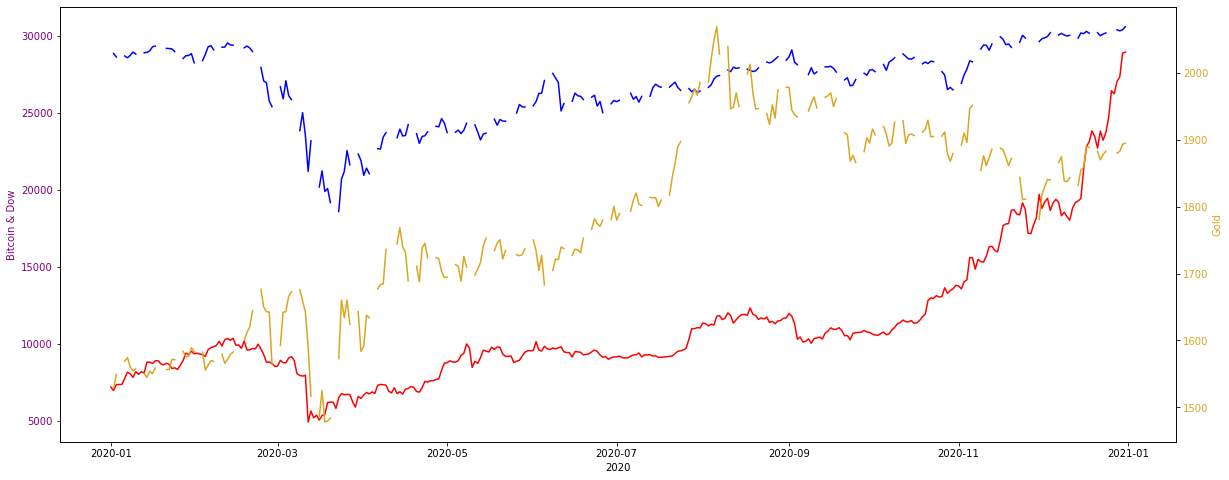

In [216]:
# set up colors
color_bit = 'red'
color_dow = 'blue'
color_gold = 'goldenrod'
color_label = 'purple'

# plot bitcoin and dow on left y-axis
fig, ax1 = plt.subplots()
ax1.set_xlabel('2020')
ax1.set_ylabel('Bitcoin & Dow', color=color_label)
ax1.plot(all_y, bitcoin_x, color=color_bit, label='Bitcoin')
ax1.plot(all_y, dow_x, color=color_dow, label='Dow')
ax1.tick_params(axis='y', labelcolor=color_label)
ax1.plot()

# set up second y-axis
ax2 = ax1.twinx()

# plot second y-axis
ax2.set_ylabel('Gold', color=color_gold)
ax2.plot(all_y, gold_x, color=color_gold)
ax2.tick_params(axis='y', labelcolor=color_gold)

# set fig size for readability
fig.set_size_inches(20, 8, forward=True)
plt.show()

# here's the link to the info on overlaying two axes: 
# https://matplotlib.org/gallery/api/two_scales.html

In [217]:
test_df.describe()

,close price
count,366.000000
mean,11110.755804
std,4309.734535
min,4914.085000
25%,8860.559375
50%,9700.819150
75%,11645.627925
max,28956.265000


In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens: Final Tumor Volumes of the Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(test_df['close price'])
plt.xlabel('January 1st - January 31st')
plt.show()

#make data folder outside jupyter notebook

## TO DO:
* Meredith: covid border shut down: february 28-march 26, 2020
* Darren: george floyd/social protests: may 25-june 25, 2020
* Ryan: election: nov 2-nov 9
* Emi: move to Maryland (good luck!)
* Chelsea: year data?
